## Frequent Token Distribution

In [50]:
import pandas as pd
from ast import literal_eval
from collections import Counter

df = pd.read_csv("/home/hyujang/multilingual-inner-lexicon/output/RQ1/WordIdentity/single_token_simple_split_Llama-2-7b-chat-hf_English_v3.csv")
for col in df.columns:
    try:
        # Check if at least one value looks like a list
        if df[col].apply(lambda x: isinstance(x, str) and x.strip().startswith("[")).any():
            df[col] = df[col].apply(literal_eval)
    except (ValueError, SyntaxError):
        continue  # Skip columns that don't parse correctly
df

,word,split_tokens,layer_1_top_token_id,layer_2_top_token_id,layer_3_top_token_id,layer_4_top_token_id,layer_5_top_token_id,layer_6_top_token_id,layer_7_top_token_id,layer_8_top_token_id,...,layer_23_top_token_str,layer_24_top_token_str,layer_25_top_token_str,layer_26_top_token_str,layer_27_top_token_str,layer_28_top_token_str,layer_29_top_token_str,layer_30_top_token_str,layer_31_top_token_str,layer_32_top_token_str
0,android,"[andr, oid]","[3398, 1007, 4772]","[3398, 1007, 2660]","[3398, 1007, 2660]","[3398, 1007, 2660]","[3398, 1007, 5669]","[3398, 1007, 5669]","[3398, 1007, 5669]","[3398, 1007, 5669]",...,"[Android, oid, roid]","[Android, oid, roid]","[Android, oid, roid]","[Android, oid, roid]","[Android, oid, roid]","[Android, oid, roid]","[oid, Android, roid]","[oid, ital, Android]","[ital, Andy, Android]","[Après, ína, ppo]"
1,polar,"[p, olar]","[10170, 21344, 21635]","[10170, 21344, 21635]","[10170, 16755, 21635]","[10170, 16755, 21635]","[10170, 16755, 21635]","[10170, 16755, 21635]","[10170, 16755, 21635]","[10170, 16755, 21635]",...,"[polar, olar, ar]","[polar, olar, ar]","[polar, olar, ar]","[polar, olar, ar]","[polar, olar, ar]","[polar, olar, ar]","[polar, olar, ar]","[polar, olar, ar]","[polar, olar, ar]","[polar, olar, Baltimore]"
2,ordinary,"[or, d, i, na, ry]","[719, 13207, 13307]","[719, 13207, 15589]","[719, 13207, 15589]","[719, 13207, 15589]","[719, 13207, 15586]","[719, 15586, 13207]","[719, 15586, 13207]","[719, 13207, 15586]",...,"[ary, ry, ery]","[ary, ry, ery]","[ary, ry, ery]","[ary, ery, ry]","[ary, ry, ery]","[ary, ry, ery]","[ary, ry, ery]","[ary, ry, ery]","[ary, ARY, ry]","[Sony, unknown, perfectly]"
3,farther,"[far, ther]","[721, 4448, 3341]","[721, 4340, 8725]","[721, 4340, 26645]","[721, 26645, 4340]","[721, 26645, 4340]","[721, 26645, 4340]","[721, 26645, 4340]","[26645, 721, 4340]",...,"[ther, further, her]","[ther, further, her]","[ther, further, her]","[ther, further, her]","[ther, further, Her]","[ther, further, Her]","[ther, Her, further]","[ther, Her, her]","[ther, Her, HER]","[へ, ther, closer]"
4,enough,"[en, ough]","[820, 14832, 10573]","[820, 3307, 8002]","[3307, 820, 8002]","[3307, 820, 8002]","[3307, 8002, 820]","[3307, 8002, 820]","[3307, 8002, 820]","[3307, 8002, 820]",...,"[enough, sufficient, sufficiently]","[enough, sufficient, sufficiently]","[enough, sufficient, ough]","[enough, sufficient, ough]","[enough, sufficient, ough]","[enough, sufficient, ough]","[enough, ough, sufficient]","[enough, ough, sufficient]","[enough, ough, sufficiently]","[suas, perfectly, fuer]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,band,"[ban, d]","[29881, 29928, 6289]","[29881, 29928, 6289]","[29881, 6289, 20726]","[29881, 3719, 6289]","[29881, 14651, 299]","[29881, 14651, 299]","[29881, 22706, 6448]","[29881, 14651, 22706]",...,"[band, bands, Band]","[band, bands, Band]","[band, Band, bands]","[band, Band, bands]","[band, Band, bands]","[band, bands, Band]","[bands, band, Band]","[bands, band, Band]","[bands, band, Band]","[bands, and, band]"
696,meeting,"[me, eting]","[15133, 11781, 1691]","[15133, 11781, 5870]","[15133, 11781, 5870]","[11781, 15133, 5870]","[11781, 15133, 5870]","[11781, 5870, 15133]","[11781, 5870, 15133]","[11781, 5870, 15133]",...,"[meeting, meet, eting]","[meeting, meet, eting]","[meeting, meet, eting]","[meeting, meet, eting]","[meeting, meet, crossing]","[meeting, meet, crossing]","[meeting, meet, eting]","[meeting, meet, inding]","[meeting, meet, crossing]","[Ál, meeting, UN]"
697,environment,"[en, vironment]","[3702, 16738, 20944]","[3702, 16738, 5177]","[3702, 16738, 5177]","[3702, 5177, 16738]","[16738, 3702, 5177]","[16738, 5177, 3702]","[16738, 5177, 29380]","[16738, 5177, 18649]",...,"[Environment, environment, Environment]","[Environment, environment, Environment]","[Environment, environment, environmental]","[Environment, environment, Environment]","[Environment, environment, environment]","[Environment, enviro

/tmp/ipykernel_2083193/2093559080.py:52: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  layer_token_freq = layer_token_freq.fillna(0).astype(int)


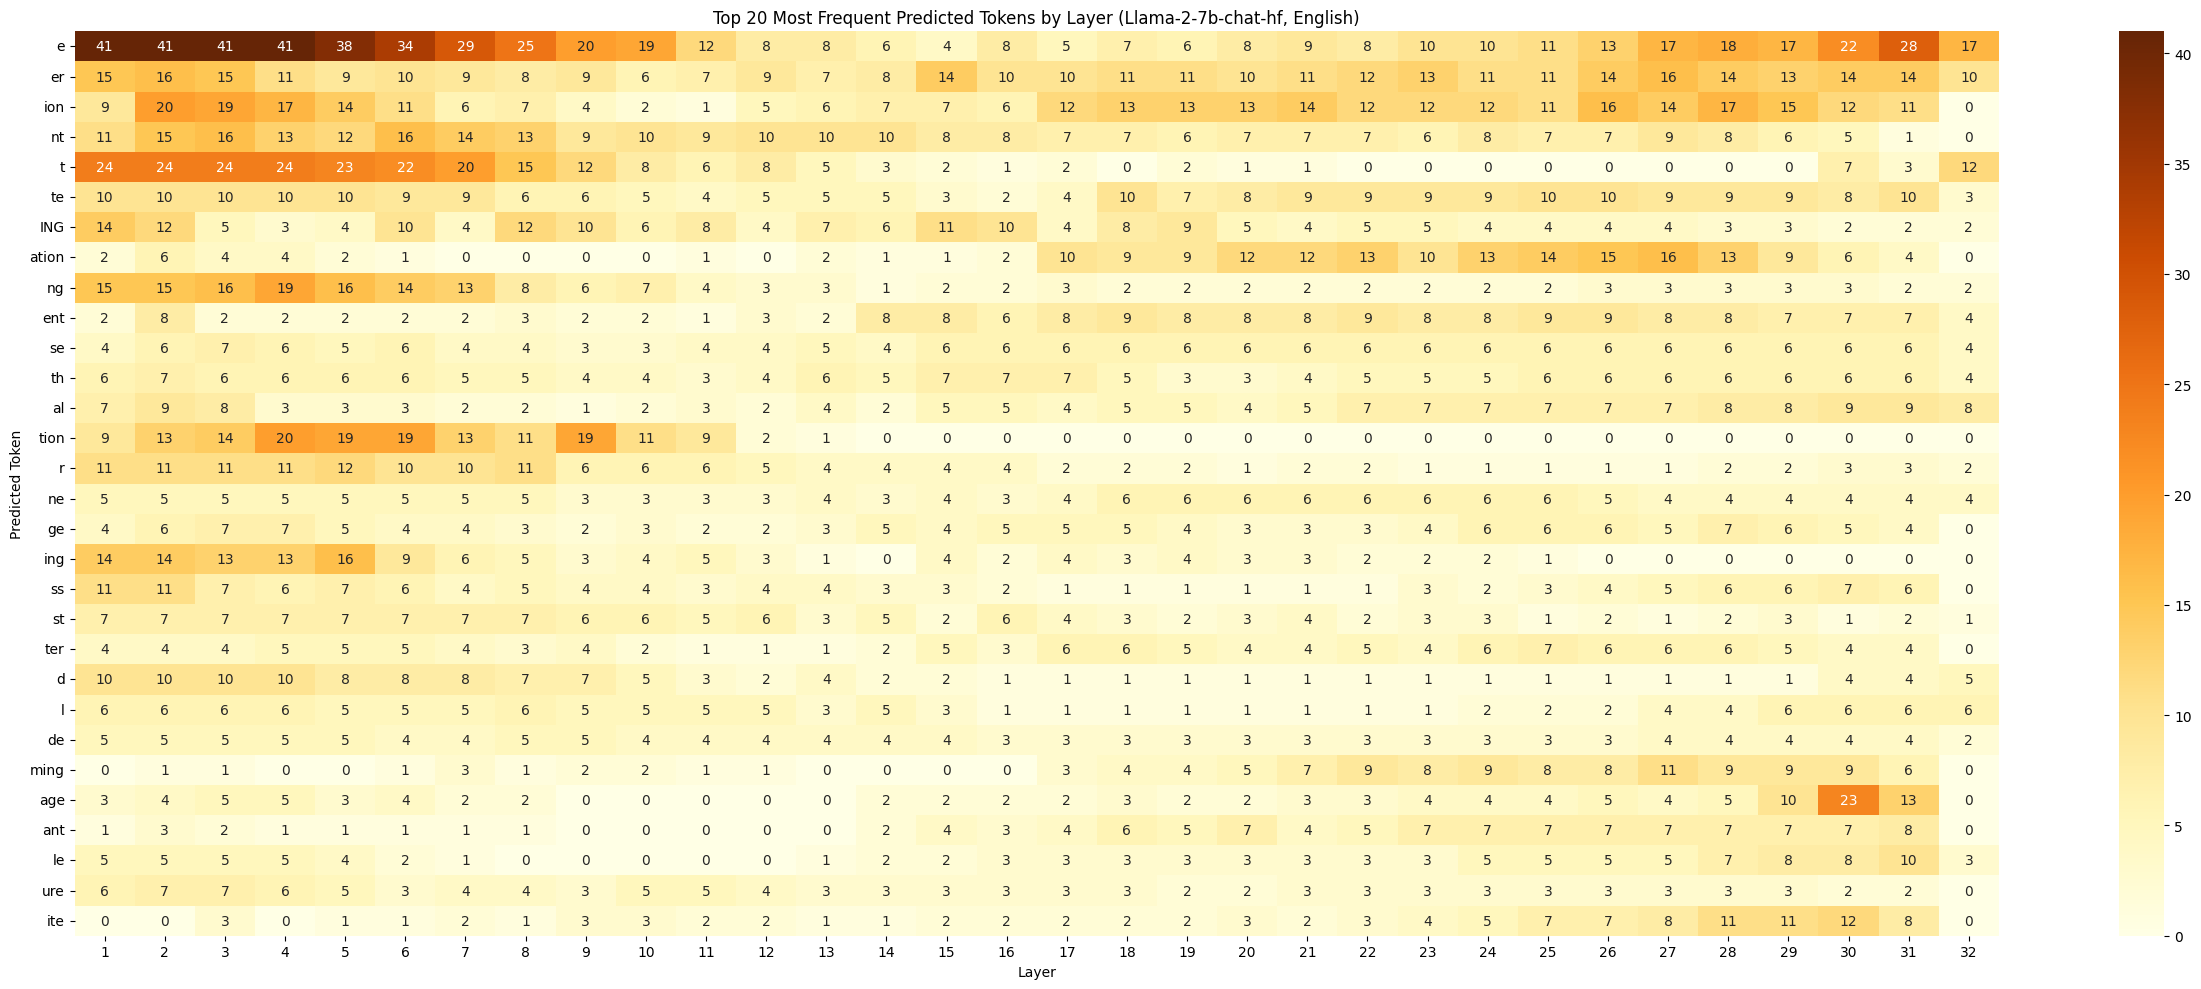

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get all token ID and string columns
id_cols = [col for col in df.columns if col.startswith("layer_") and col.endswith("_top_token_id")]
str_cols = [col for col in df.columns if col.startswith("layer_") and col.endswith("_top_token_str")]

# Make sure they're in the same order
id_cols.sort()
str_cols.sort()

# Initialize the mapping dictionary
token_id_to_str = {}

# Iterate through layers
for id_col, str_col in zip(id_cols, str_cols):
    for id_list, str_list in zip(df[id_col], df[str_col]):
        for token_id, token_str in zip(id_list, str_list):
            if token_id not in token_id_to_str:
                token_id_to_str[token_id] = token_str



token_str_cols = [col for col in df.columns if col.startswith("layer_") and col.endswith("_top_token_id")]

# Flatten all top-3 token outputs across layers and words
all_tokens = []

for col in token_str_cols:
    for token_list_str in df[col]:
        try:
            all_tokens.extend(token_list_str)
        except:
            continue

top_20_tokens = [tok for tok, _ in Counter(all_tokens).most_common(30)]

# Step 2: Count frequency of each top token per layer
layer_token_freq = pd.DataFrame(index=top_20_tokens, columns=token_str_cols)

for col in token_str_cols:
    token_counts = Counter()
    for token_list_str in df[col]:
        try:
            token_counts.update(token_list_str)
        except:
            continue
    for tok in top_20_tokens:
        layer_token_freq.at[tok, col] = token_counts.get(tok, 0)

# Convert to numeric
layer_token_freq = layer_token_freq.fillna(0).astype(int)
layer_token_freq.index = layer_token_freq.index.astype(int)
token_id_to_str = {int(k): v for k, v in token_id_to_str.items()}
layer_token_freq.rename(index=token_id_to_str, inplace=True)

# Optional: clean column names (layer_1 -> 1, etc.)
layer_token_freq.columns = [int(col.split("_")[1]) for col in layer_token_freq.columns]

# Step 3: Plot
plt.figure(figsize=(25, 10))
sns.heatmap(layer_token_freq, annot=True, fmt='d', cmap="YlOrBr")
plt.title("Top 30 Most Frequent Predicted Tokens by Layer (Llama-2-7b-chat-hf, English)")
plt.xlabel("Layer")
plt.ylabel("Predicted Token")
plt.tight_layout()
plt.show()


/work/hyujang/miniconda3/envs/thesis/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/work/hyujang/miniconda3/envs/thesis/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.draw()
/work/hyujang/miniconda3/envs/thesis/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/work/hyujang/miniconda3/envs/thesis/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 2332 (\N{DEVANAGARI LETTER JA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/work/hyujang/miniconda3/envs/thesis/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 2342 (\N{DEVANAGARI LETTER DA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/work/hyujang/miniconda3/envs/thesis/lib/python3.

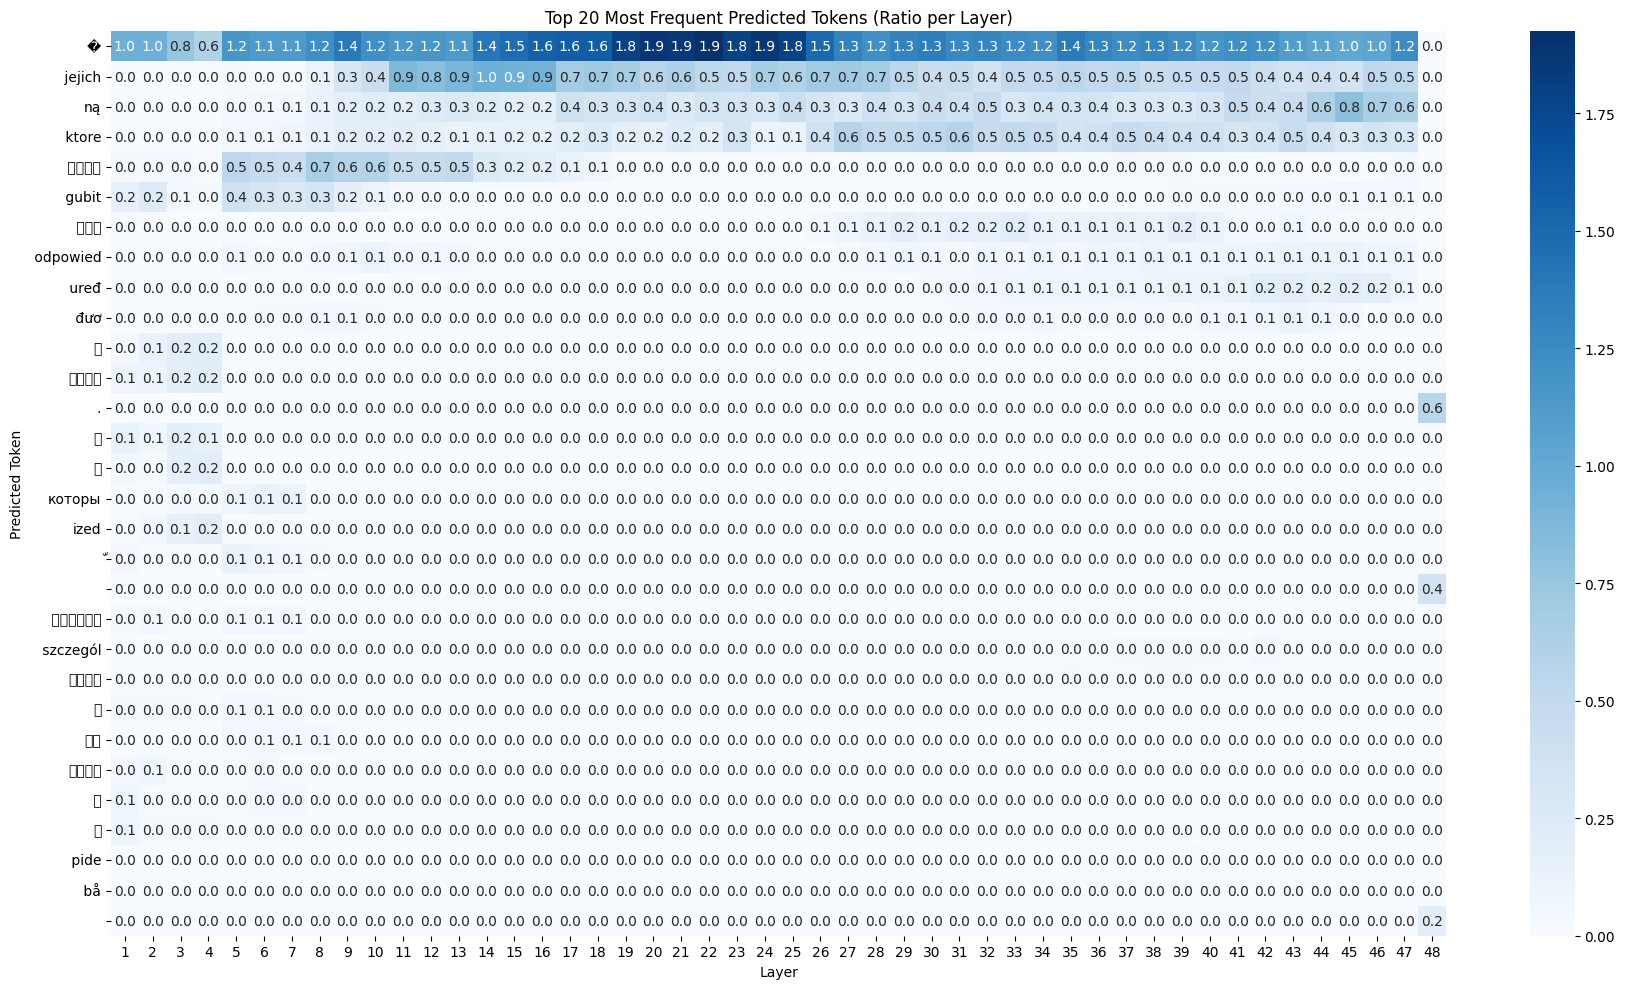

In [38]:
# Convert to numeric and normalize to ratio
layer_token_freq = layer_token_freq.fillna(0).astype(int)
layer_token_ratio = layer_token_freq / len(df)  # normalize to 0.0–1.0

# Optional: simplify column names (layer_1_top_token_str → 1, 2, ..., etc.)
# layer_token_ratio.columns = [int(col.split("_")[1]) for col in layer_token_ratio.columns]

# Step 3: Plot ratio heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(layer_token_ratio, annot=True, fmt=".1f", cmap="Blues")
plt.title("Top 20 Most Frequent Predicted Tokens (Ratio per Layer)")
plt.xlabel("Layer")
plt.ylabel("Predicted Token")
plt.tight_layout()
plt.show()


## Diagnosing Rogue Diemnsion via Anisotropy

In [1]:
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "0"

from logitlens import LogitLens
import pandas as pd
import matplotlib.pyplot as plt
import ast

In [2]:
# MODEL_NAME = "google/gemma-3-12b-it"
MODEL_NAME = "meta-llama/Llama-2-7b-chat-hf"
# MODEL_NAME = "Tower-Babel/Babel-9B-Chat"

LANGUAGE = "English"
logit_lens = LogitLens(LANGUAGE, MODEL_NAME)
MODEL_NAME = MODEL_NAME.split("/")[-1]
path1 = f"/home/hyujang/multilingual-inner-lexicon/data/RQ1/WordIdentity/single_token_splitted_{MODEL_NAME}_{LANGUAGE}_v2.csv"
df = pd.read_csv(path1)
all_hiddens, words = logit_lens.collect_layerwise_hidden_states(df, type="simple_split")

Using device: cuda


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Model meta-llama/Llama-2-7b-chat-hf for English loaded successfully.


100%|██████████| 700/700 [00:18<00:00, 37.04it/s]


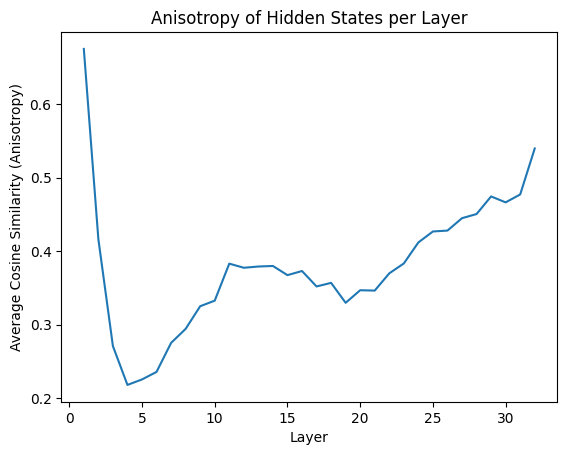

In [3]:
import torch
import torch.nn.functional as F

def measure_anisotropy(hidden_matrix: torch.Tensor, sample_size=1000):
    normed = F.normalize(hidden_matrix, dim=-1)
    N = normed.size(0)
    idx1 = torch.randint(0, N, (sample_size,))
    idx2 = torch.randint(0, N, (sample_size,))
    sims = (normed[idx1] * normed[idx2]).sum(dim=1)
    return sims.mean().item()

anisotropy_per_layer = [measure_anisotropy(h) for h in all_hiddens]

import matplotlib.pyplot as plt
plt.plot(range(1, len(anisotropy_per_layer)+1), anisotropy_per_layer)
plt.xlabel("Layer")
plt.ylabel("Average Cosine Similarity (Anisotropy)")
plt.title("Anisotropy of Hidden States per Layer")
plt.show()


In [4]:
logits_per_layer = []
top_tokens_per_layer = []

for layer_idx, hidden in enumerate(all_hiddens):
    # hidden: [700, 3840]
    # Logits: [700, vocab_size]
    logits = torch.matmul(hidden.to(logit_lens.device), logit_lens.embedding_matrix.T)  # matmul hidden * embedding.T
    logits_per_layer.append(logits.cpu())

    # Top token ids per example in batch for this layer
    top_tokens = torch.argmax(logits, dim=-1).cpu().numpy()  # shape: (700,)
    top_tokens_per_layer.append(top_tokens)

def entropy(logits):
    probs = F.softmax(logits, dim=-1)
    return (-probs * probs.log()).sum(dim=-1).mean().item()  # mean entropy over batch

entropy_per_layer = [entropy(logits) for logits in logits_per_layer]


In [5]:
import numpy as np
top_tokens_per_layer = np.array(top_tokens_per_layer)  # shape: (48, 700)

# For each word, check if predicted token is the same across all layers
same_token_across_layers = np.all(top_tokens_per_layer == top_tokens_per_layer[0, :], axis=0)
batch_size = all_hiddens[0].shape[0]


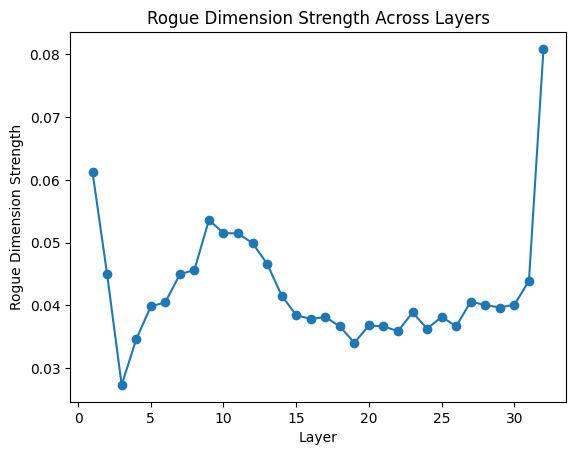

: 

In [ ]:
rogue_strengths = []

for layer_idx, hidden in enumerate(all_hiddens):
    # Convert to float32 if needed
    hidden = hidden.float()  # avoid bfloat16 issue
    
    hidden_centered = hidden - hidden.mean(dim=0, keepdim=True)  # [700, 3840]
    # The covariance matrix captures how each dimension of the hidden vectors varies and co-varies with others across tokens
    cov = (hidden_centered.T @ hidden_centered) / (hidden_centered.shape[0] - 1)  # [3840, 3840] 
    
    eigvals, eigvecs = torch.linalg.eigh(cov)
    eigvals = eigvals.flip(dims=[0])  # descending order
    
    ratio = eigvals[0] / eigvals.sum()
    rogue_strengths.append(ratio.item())

# Plot rogue_strengths with matplotlib (using Python floats, so no np needed)
import matplotlib.pyplot as plt
plt.plot(range(1, len(rogue_strengths)+1), rogue_strengths, marker='o')
plt.xlabel('Layer')
plt.ylabel('Rogue Dimension Strength')
plt.title('Rogue Dimension Strength Across Layers')
plt.show()